<a href="https://colab.research.google.com/github/Wazir123456/assignment1/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

sentiment_df = pd.read_csv('/content/bitcoin_sentiment.csv', parse_dates=['date'])
print(sentiment_df.head())
print(sentiment_df.info())

    timestamp  value classification       date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02
2  1517635800     40           Fear 2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB
None


In [42]:
trades_col_names = ['account', 'asset', 'price', 'size', 'notional', 'side', 'time', 'closedPnL', 'trade_type', 'leverage', 'transaction_hash', 'order_id', 'is_taker', 'fee', 'open_interest', 'timestamp_raw']
trades_df = pd.read_csv('/content/hyperliquid_trades.csv', skiprows=[1], names=trades_col_names)
trades_df['time'] = pd.to_datetime(trades_df['time'], unit='us', errors='coerce')

# Map 'Classification' in sentiment_df to a numeric 'sentiment_score'
sentiment_map = {'Fear': 0, 'Neutral': 1, 'Greed': 2}
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)

print("Trades DataFrame Head:")
print(trades_df.head())
print("\nTrades DataFrame Info:")
print(trades_df.info())
print("\nSentiment DataFrame Head with Score:")
print(sentiment_df.head())

Trades DataFrame Head:
                                      account     asset  \
0                                  Close Long  6.544227   
1  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   
2  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   
3  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   
4  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   

                                               price          size notional  \
0  0x63bd63f4d8c8b5d034fe041f38ed0b0201d3001e7ea8...  7.842022e+10     TRUE   
1                                             129.19  1.200000e+02  15502.8   
2                                             129.18  7.361000e+01  9508.94   
3                                             129.17  1.000000e+02    12917   
4                                             129.17  2.169000e+01   2801.7   

       side                time     closedPnL  trade_type   leverage  \
0  0.534001 1978-01-07 05:46:40  1.740000e+12         NaN        NaN   
1  

/tmp/ipython-input-1657931809.py:2: DtypeWarning: Columns (2,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades_df = pd.read_csv('/content/hyperliquid_trades.csv', skiprows=[1], names=trades_col_names)
/tmp/ipython-input-1657931809.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  trades_df['time'] = pd.to_datetime(trades_df['time'], unit='us', errors='coerce')


In [43]:
trades_col_names = ['account', 'asset', 'price', 'size', 'notional', 'side', 'time', 'closedPnL', 'trade_type', 'leverage', 'transaction_hash', 'order_id', 'is_taker', 'fee', 'open_interest', 'timestamp_raw']
trades_df = pd.read_csv('/content/hyperliquid_trades.csv', skiprows=[1], names=trades_col_names)

# Convert 'timestamp_raw' (which appears to be Unix milliseconds) to datetime and assign to 'time'
trades_df['time'] = pd.to_datetime(trades_df['timestamp_raw'], unit='ms', errors='coerce')

# Map 'Classification' in sentiment_df to a numeric 'sentiment_score' as specified
sentiment_map = {'Fear': 0, 'Neutral': 1, 'Greed': 2}
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)

print("Trades DataFrame Head:")
print(trades_df.head())
print("\nTrades DataFrame Info:")
print(trades_df.info())
print("\nSentiment DataFrame Head with Score:")
print(sentiment_df.head())

Trades DataFrame Head:
                                      account     asset  \
0                                  Close Long  6.544227   
1  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   
2  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   
3  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   
4  0xb899e522b5715391ae1d4f137653e7906c5e2115       SOL   

                                               price          size notional  \
0  0x63bd63f4d8c8b5d034fe041f38ed0b0201d3001e7ea8...  7.842022e+10     TRUE   
1                                             129.19  1.200000e+02  15502.8   
2                                             129.18  7.361000e+01  9508.94   
3                                             129.17  1.000000e+02    12917   
4                                             129.17  2.169000e+01   2801.7   

       side                time     closedPnL  trade_type   leverage  \
0  0.534001                 NaT  1.740000e+12         NaN        NaN   
1  

/tmp/ipython-input-2217322143.py:2: DtypeWarning: Columns (2,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades_df = pd.read_csv('/content/hyperliquid_trades.csv', skiprows=[1], names=trades_col_names)


In [44]:
trades_col_names = ['account', 'asset', 'price', 'size', 'notional', 'side', 'time', 'closedPnL', 'trade_type', 'leverage', 'transaction_hash', 'order_id', 'is_taker', 'fee', 'open_interest', 'timestamp_raw']
trades_df = pd.read_csv('/content/hyperliquid_trades.csv', skiprows=2, names=trades_col_names)

# Convert 'timestamp_raw' (which appears to be Unix milliseconds) to datetime and assign to 'time'
trades_df['time'] = pd.to_datetime(trades_df['timestamp_raw'], unit='ms', errors='coerce')

# Map 'Classification' in sentiment_df to a numeric 'sentiment_score' as specified
sentiment_map = {'Fear': 0, 'Neutral': 1, 'Greed': 2}
sentiment_df['sentiment_score'] = sentiment_df['classification'].map(sentiment_map)

print("Trades DataFrame Head:")
print(trades_df.head())
print("\nTrades DataFrame Info:")
print(trades_df.info())
print("\nSentiment DataFrame Head with Score:")
print(sentiment_df.head())

Trades DataFrame Head:
                                      account asset   price    size  notional  \
0  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.19  120.00  15502.80   
1  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.18   73.61   9508.94   
2  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.17  100.00  12917.00   
3  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.17   21.69   2801.70   
4  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.16   77.36   9991.82   

   side                time  closedPnL  trade_type   leverage  \
0  SELL 2025-02-19 21:20:00    6230.35  Close Long  43.908000   
1  SELL 2025-02-19 21:20:00    6110.35  Close Long  26.197799   
2  SELL 2025-02-19 21:20:00    6036.74  Close Long  34.590000   
3  SELL 2025-02-19 21:20:00    5936.74  Close Long   7.502571   
4  SELL 2025-02-19 21:20:00    5915.05  Close Long  25.985224   

                                    transaction_hash     order_id  is_taker  \
0  0x63bd63f4d8c8b5d

In [45]:
trades_df['pnl_per_size'] = trades_df['closedPnL'] / trades_df['size']
trades_df['side_binary'] = trades_df['side'].str.upper().map({'BUY': 1, 'SELL': 0})

print(trades_df.head())

                                      account asset   price    size  notional  \
0  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.19  120.00  15502.80   
1  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.18   73.61   9508.94   
2  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.17  100.00  12917.00   
3  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.17   21.69   2801.70   
4  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.16   77.36   9991.82   

   side                time  closedPnL  trade_type   leverage  \
0  SELL 2025-02-19 21:20:00    6230.35  Close Long  43.908000   
1  SELL 2025-02-19 21:20:00    6110.35  Close Long  26.197799   
2  SELL 2025-02-19 21:20:00    6036.74  Close Long  34.590000   
3  SELL 2025-02-19 21:20:00    5936.74  Close Long   7.502571   
4  SELL 2025-02-19 21:20:00    5915.05  Close Long  25.985224   

                                    transaction_hash     order_id  is_taker  \
0  0x63bd63f4d8c8b5d034fe041f38ed0b0201d300

In [46]:
trades_df['trade_date'] = trades_df['time'].dt.normalize()
sentiment_df['date_only'] = sentiment_df['date'].dt.normalize()

print("Trades DataFrame Head with trade_date:")
print(trades_df[['time', 'trade_date']].head())
print("\nSentiment DataFrame Head with date_only:")
print(sentiment_df[['date', 'date_only']].head())

Trades DataFrame Head with trade_date:
                 time trade_date
0 2025-02-19 21:20:00 2025-02-19
1 2025-02-19 21:20:00 2025-02-19
2 2025-02-19 21:20:00 2025-02-19
3 2025-02-19 21:20:00 2025-02-19
4 2025-02-19 21:20:00 2025-02-19

Sentiment DataFrame Head with date_only:
        date  date_only
0 2018-02-01 2018-02-01
1 2018-02-02 2018-02-02
2 2018-02-03 2018-02-03
3 2018-02-04 2018-02-04
4 2018-02-05 2018-02-05


In [47]:
merged_df = pd.merge(trades_df, sentiment_df, left_on='trade_date', right_on='date_only', how='inner')

print("Merged DataFrame Head:")
print(merged_df.head())
print("\nMerged DataFrame Info:")
print(merged_df.info())

Merged DataFrame Head:
                                      account asset   price    size  notional  \
0  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.19  120.00  15502.80   
1  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.18   73.61   9508.94   
2  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.17  100.00  12917.00   
3  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.17   21.69   2801.70   
4  0xb899e522b5715391ae1d4f137653e7906c5e2115   SOL  129.16   77.36   9991.82   

   side                time  closedPnL  trade_type   leverage  ...  \
0  SELL 2025-02-19 21:20:00    6230.35  Close Long  43.908000  ...   
1  SELL 2025-02-19 21:20:00    6110.35  Close Long  26.197799  ...   
2  SELL 2025-02-19 21:20:00    6036.74  Close Long  34.590000  ...   
3  SELL 2025-02-19 21:20:00    5936.74  Close Long   7.502571  ...   
4  SELL 2025-02-19 21:20:00    5915.05  Close Long  25.985224  ...   

  timestamp_raw  pnl_per_size  side_binary  trade_date   timestamp  v

/tmp/ipython-input-600701936.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_score', data=merged_df, palette='viridis')


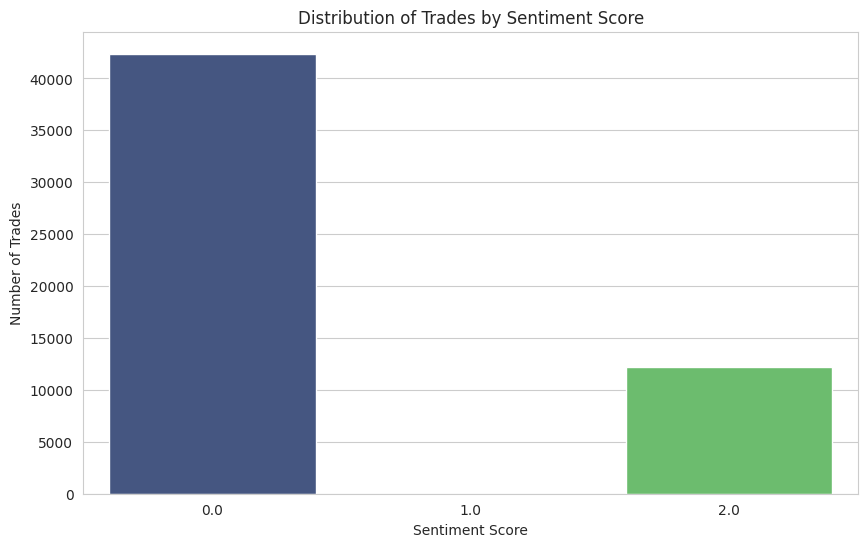

/tmp/ipython-input-600701936.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment_score', y='closedPnL', data=merged_df, palette='coolwarm')


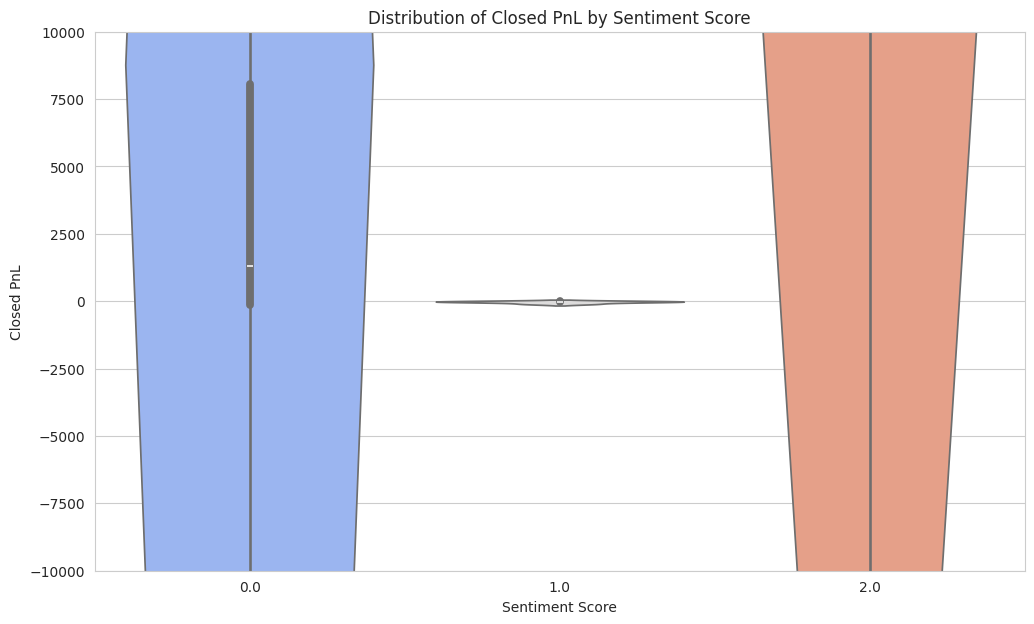

/tmp/ipython-input-600701936.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment_score', y='pnl_per_size', data=merged_df, palette='mako')


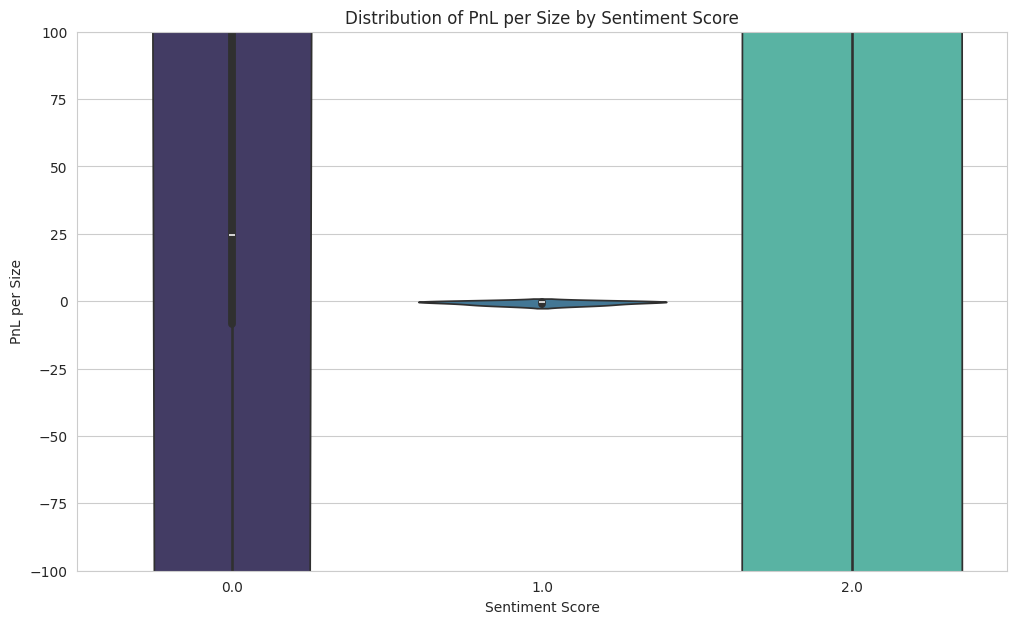

<Figure size 1200x700 with 0 Axes>

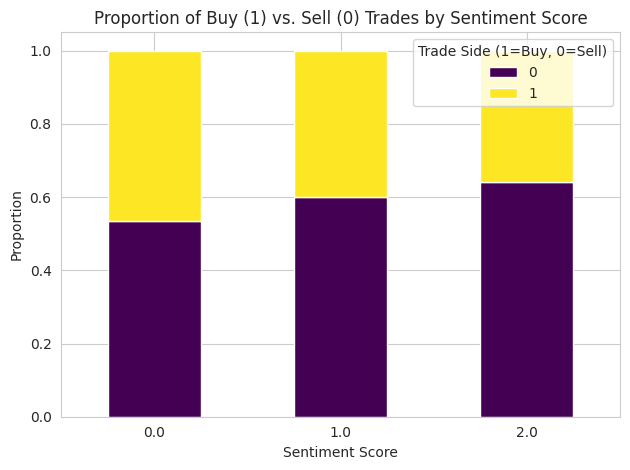

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Distribution of trades by sentiment_score
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_score', data=merged_df, palette='viridis')
plt.title('Distribution of Trades by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Trades')
plt.show()

# 2. Distribution of closedPnL for each sentiment_score category
plt.figure(figsize=(12, 7))
sns.violinplot(x='sentiment_score', y='closedPnL', data=merged_df, palette='coolwarm')
plt.title('Distribution of Closed PnL by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Closed PnL')
plt.ylim(-10000, 10000) # Limiting y-axis for better visualization of main distribution
plt.show()

# 3. Distribution of pnl_per_size for each sentiment_score category
plt.figure(figsize=(12, 7))
sns.violinplot(x='sentiment_score', y='pnl_per_size', data=merged_df, palette='mako')
plt.title('Distribution of PnL per Size by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('PnL per Size')
plt.ylim(-100, 100) # Limiting y-axis for better visualization of main distribution
plt.show()

# 4. Proportion of buy vs. sell trades for each sentiment_score category
# Calculate proportions
side_proportions = merged_df.groupby('sentiment_score')['side_binary'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 7))
side_proportions.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Buy (1) vs. Sell (0) Trades by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Trade Side (1=Buy, 0=Sell)')
plt.tight_layout()
plt.show()

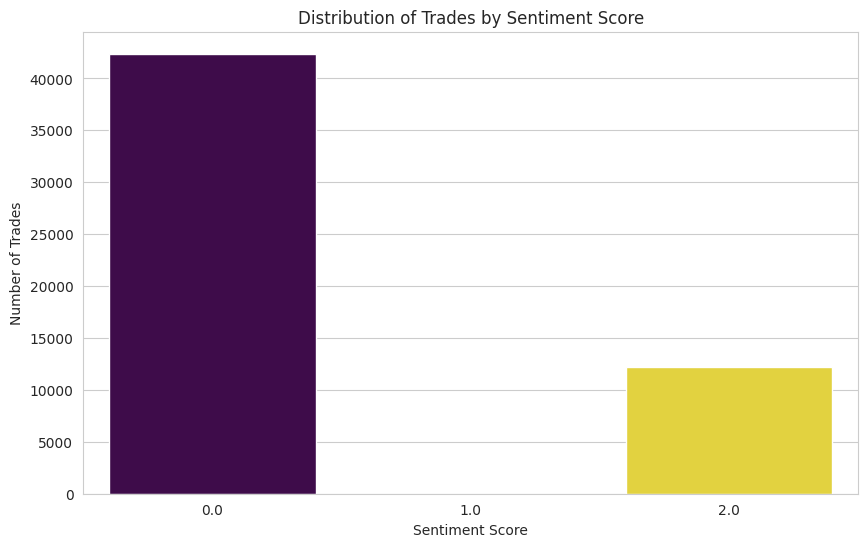

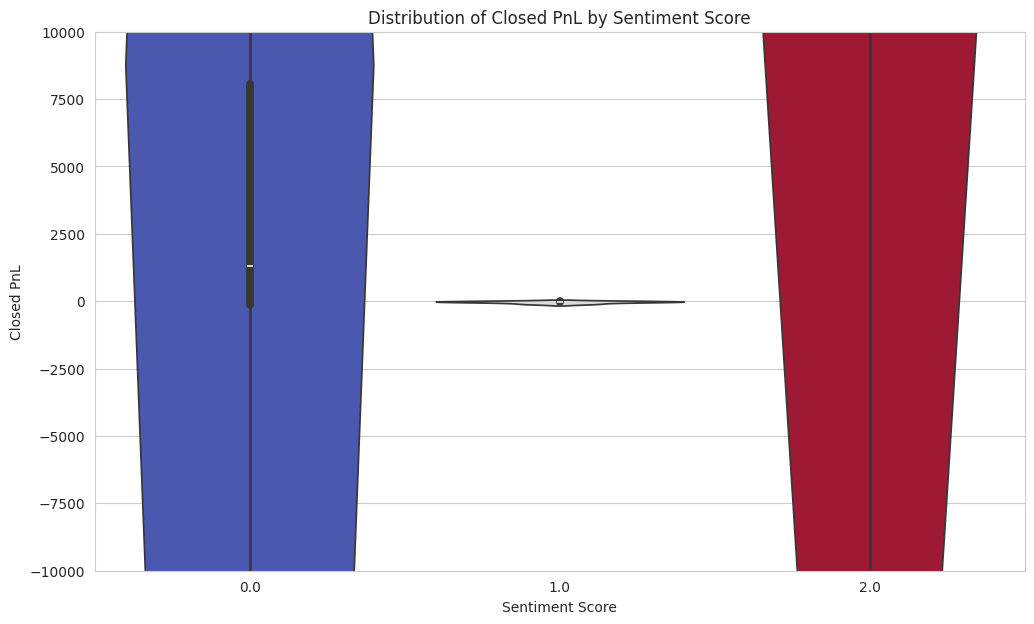

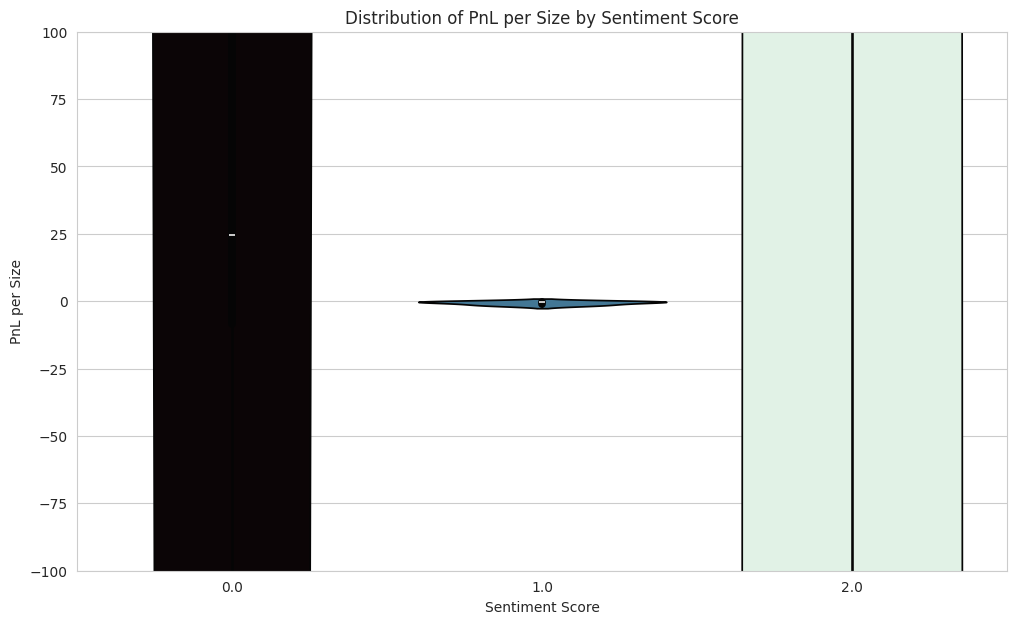

<Figure size 1200x700 with 0 Axes>

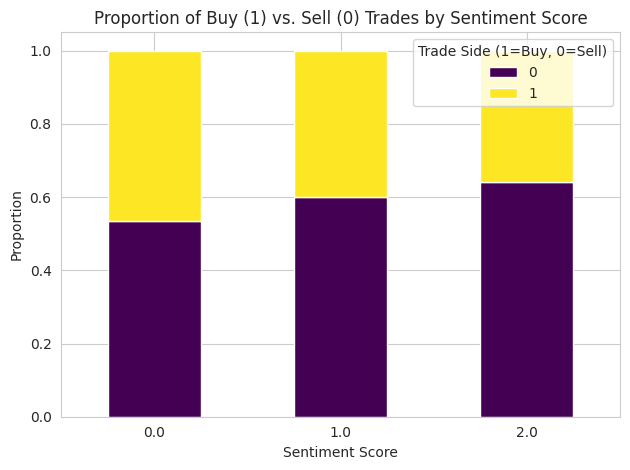

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Distribution of trades by sentiment_score
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_score', data=merged_df, palette='viridis', hue='sentiment_score', legend=False)
plt.title('Distribution of Trades by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Trades')
plt.show()

# 2. Distribution of closedPnL for each sentiment_score category
plt.figure(figsize=(12, 7))
sns.violinplot(x='sentiment_score', y='closedPnL', data=merged_df, palette='coolwarm', hue='sentiment_score', legend=False)
plt.title('Distribution of Closed PnL by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Closed PnL')
plt.ylim(-10000, 10000) # Limiting y-axis for better visualization of main distribution
plt.show()

# 3. Distribution of pnl_per_size for each sentiment_score category
plt.figure(figsize=(12, 7))
sns.violinplot(x='sentiment_score', y='pnl_per_size', data=merged_df, palette='mako', hue='sentiment_score', legend=False)
plt.title('Distribution of PnL per Size by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('PnL per Size')
plt.ylim(-100, 100) # Limiting y-axis for better visualization of main distribution
plt.show()

# 4. Proportion of buy vs. sell trades for each sentiment_score category
# Calculate proportions
side_proportions = merged_df.groupby('sentiment_score')['side_binary'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 7))
side_proportions.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Buy (1) vs. Sell (0) Trades by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Trade Side (1=Buy, 0=Sell)')
plt.tight_layout()
plt.show()

In [50]:
merged_df['hour'] = merged_df['time'].dt.hour

print("Merged DataFrame Head with 'hour' feature:")
print(merged_df[['time', 'hour']].head())

Merged DataFrame Head with 'hour' feature:
                 time  hour
0 2025-02-19 21:20:00    21
1 2025-02-19 21:20:00    21
2 2025-02-19 21:20:00    21
3 2025-02-19 21:20:00    21
4 2025-02-19 21:20:00    21


In [51]:
account_daily = merged_df.groupby(['account', 'trade_date']).agg(
    closedPnL=('closedPnL', 'sum'),
    size=('size', 'sum'),
    pnl_per_size=('pnl_per_size', 'mean'),
    side_binary=('side_binary', 'mean'),
    leverage=('leverage', 'sum'),
    sentiment_score=('sentiment_score', 'first'), # Keep the daily sentiment score
    classification=('classification', 'first')
).reset_index()

print("Account Daily Aggregation Head:")
print(account_daily.head())
print("\nAccount Daily Aggregation Info:")
print(account_daily.info())

Account Daily Aggregation Head:
                                      account trade_date     closedPnL  \
0  0x271b280974205ca63b716753467d5a371de622ab 2024-07-03 -1.594300e+02   
1  0x271b280974205ca63b716753467d5a371de622ab 2024-10-27  3.457797e+02   
2  0x271b280974205ca63b716753467d5a371de622ab 2025-02-19  3.612156e+03   
3  0x2c229d22b100a7beb69122eed721cee9b24011dd 2024-10-27  1.748630e+08   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd 2025-02-19  1.355273e+09   

           size  pnl_per_size  side_binary       leverage  sentiment_score  \
0  2.000000e+02     -0.611662     0.400000      -1.000000              1.0   
1  4.154946e+02     -0.537941     0.600000    1793.160215              2.0   
2  2.918578e+04  -2617.825587     0.445423   29970.928216              0.0   
3  2.542236e+07     79.421734     0.399738   52215.729448              2.0   
4  6.248754e+07   1301.439871     0.352894  116412.254606              0.0   

  classification  
0        Neutral  
1          Greed

In [52]:
avg_pnl_by_sentiment = account_daily.groupby('sentiment_score')['closedPnL'].mean().reset_index()
print("Average Closed PnL by Sentiment Score:")
print(avg_pnl_by_sentiment)


Average Closed PnL by Sentiment Score:
   sentiment_score     closedPnL
0              0.0  1.620928e+08
1              1.0 -1.594300e+02
2              2.0  6.458715e+07


In [53]:
fear_positive_pnl_accounts = account_daily[(account_daily['sentiment_score'] == 0) & (account_daily['closedPnL'] > 0)]['account'].unique()
greed_negative_pnl_accounts = account_daily[(account_daily['sentiment_score'] == 2) & (account_daily['closedPnL'] < 0)]['account'].unique()

contrarian_traders = pd.Series(list(set(fear_positive_pnl_accounts) & set(greed_negative_pnl_accounts)))

print("Contrarian Traders (positive PnL during Fear, negative PnL during Greed):")
print(contrarian_traders)


Contrarian Traders (positive PnL during Fear, negative PnL during Greed):
0    0x72743ae2822edd658c0c50608fd7c5c501b2afbd
dtype: object


In [54]:
selected_cols = ['sentiment_score', 'closedPnL', 'size', 'pnl_per_size', 'side_binary', 'leverage']
correlation_matrix = account_daily[selected_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 sentiment_score  closedPnL      size  pnl_per_size  \
sentiment_score         1.000000  -0.140270 -0.192326      0.144067   
closedPnL              -0.140270   1.000000  0.895160      0.009282   
size                   -0.192326   0.895160  1.000000     -0.012514   
pnl_per_size            0.144067   0.009282 -0.012514      1.000000   
side_binary             0.137973  -0.242454 -0.217262      0.408119   
leverage               -0.021524   0.104293 -0.046242      0.426934   

                 side_binary  leverage  
sentiment_score     0.137973 -0.021524  
closedPnL          -0.242454  0.104293  
size               -0.217262 -0.046242  
pnl_per_size        0.408119  0.426934  
side_binary         1.000000 -0.183368  
leverage           -0.183368  1.000000  


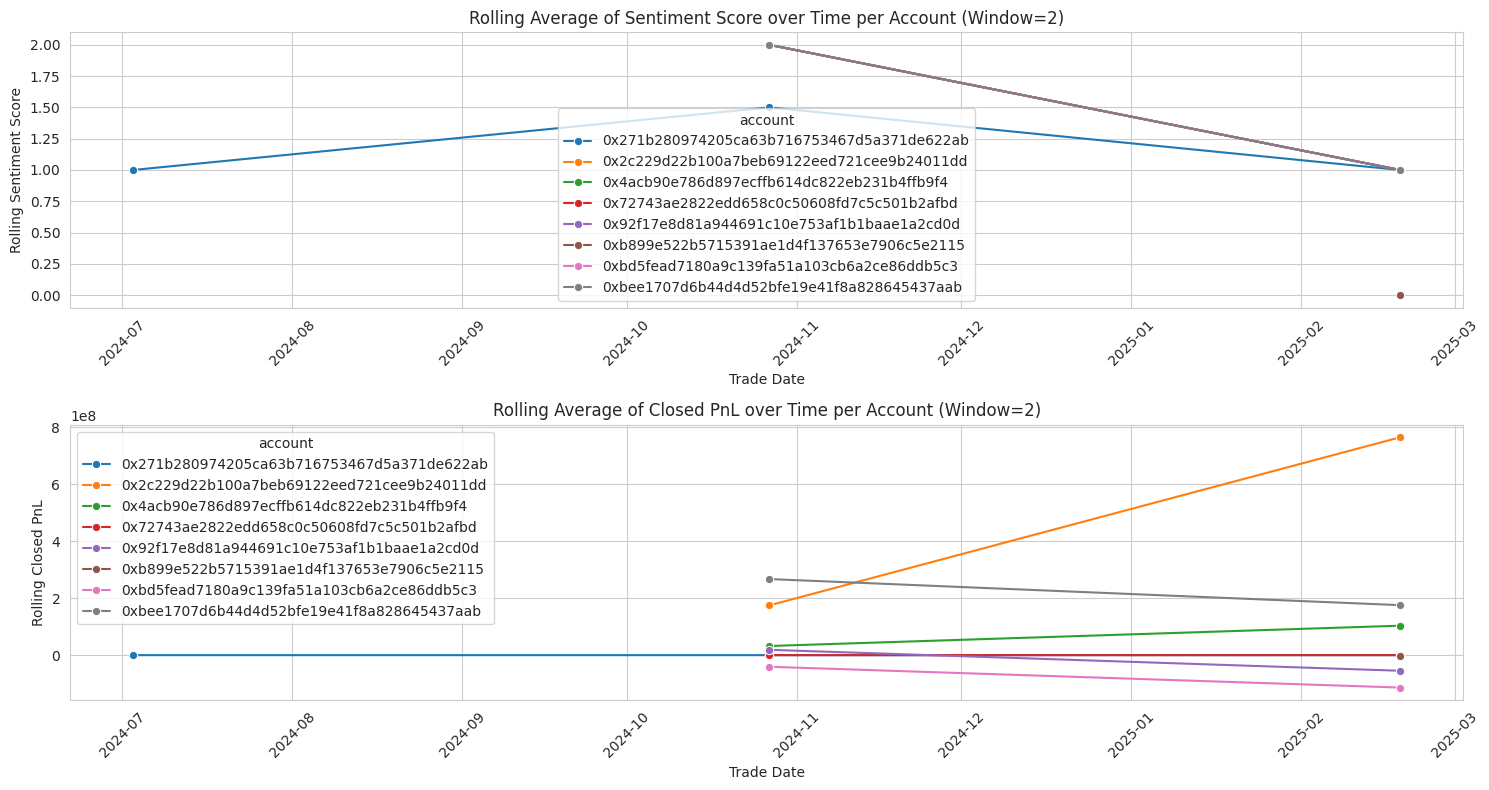

In [55]:
account_daily = account_daily.sort_values(by=['account', 'trade_date'])

account_daily['rolling_sentiment_score'] = account_daily.groupby('account')['sentiment_score'].transform(lambda x: x.rolling(window=2, min_periods=1).mean())
account_daily['rolling_closedPnL'] = account_daily.groupby('account')['closedPnL'].transform(lambda x: x.rolling(window=2, min_periods=1).mean())


# Plotting rolling averages
plt.figure(figsize=(15, 8))

# Plot rolling sentiment score
plt.subplot(2, 1, 1)
sns.lineplot(data=account_daily, x='trade_date', y='rolling_sentiment_score', hue='account', marker='o')
plt.title('Rolling Average of Sentiment Score over Time per Account (Window=2)')
plt.xlabel('Trade Date')
plt.ylabel('Rolling Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot rolling closed PnL
plt.subplot(2, 1, 2)
sns.lineplot(data=account_daily, x='trade_date', y='rolling_closedPnL', hue='account', marker='o')
plt.title('Rolling Average of Closed PnL over Time per Account (Window=2)')
plt.xlabel('Trade Date')
plt.ylabel('Rolling Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [56]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 sentiment_score  closedPnL      size  pnl_per_size  \
sentiment_score         1.000000  -0.140270 -0.192326      0.144067   
closedPnL              -0.140270   1.000000  0.895160      0.009282   
size                   -0.192326   0.895160  1.000000     -0.012514   
pnl_per_size            0.144067   0.009282 -0.012514      1.000000   
side_binary             0.137973  -0.242454 -0.217262      0.408119   
leverage               -0.021524   0.104293 -0.046242      0.426934   

                 side_binary  leverage  
sentiment_score     0.137973 -0.021524  
closedPnL          -0.242454  0.104293  
size               -0.217262 -0.046242  
pnl_per_size        0.408119  0.426934  
side_binary         1.000000 -0.183368  
leverage           -0.183368  1.000000  


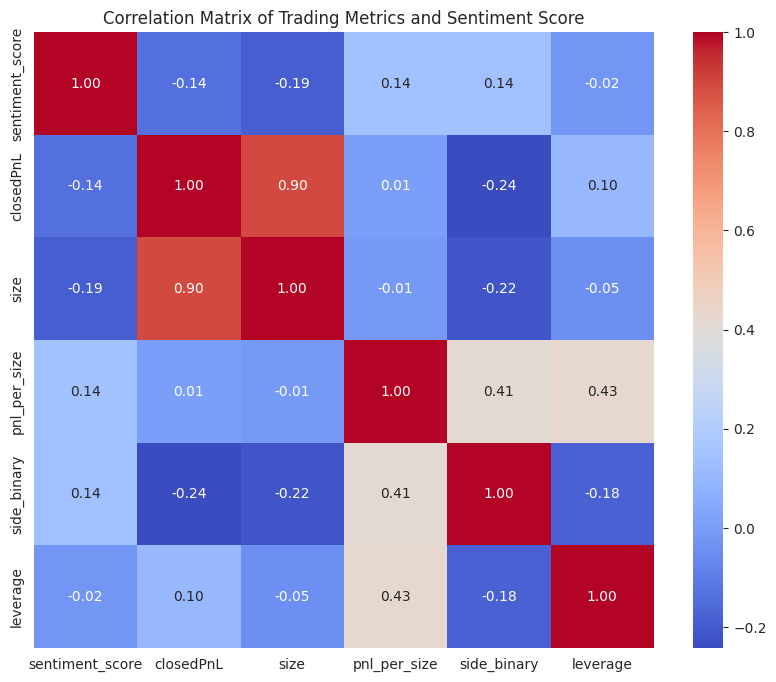

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trading Metrics and Sentiment Score')
plt.show()